In [1]:
import pandas as pd
import numpy as np
import importlib
import datetime as dt
import requests
import sys, os
import logging

import report_generator
importlib.reload(report_generator)

#comment or uncomment line below if you'd like to see what the code is doing while running
logging.basicConfig(format='%(levelname)s (%(asctime)s): %(message)s (Line:%(lineno)d in %(filename)s))', datefmt='%Y/%m/%d %I:%M:%S %p', level = logging.INFO)
#pd.set_option("display.max_rows",1050)
pd.set_option("display.max_columns", 40)

#

sys.path.append(path)

import keys

client = CoinMetricsClient(keys.coinmetrics_key, verbose=False)

In [2]:
fred_api_key = '4d7dc5c95513ef9bb84078e6d0fae493'
coinglass_api = '06b33af895f04b218cce5745a71275ec'
messari_api = 
talos_api = 
talos_secret_api = 

In [3]:
rg = report_generator.ReportAgregator(messari_api, coinglass_api, fred_api_key, talos_api, talos_secret_api, dark_mode = True)

starknet
strike


INFO (2024/04/26 02:10:01 PM): Fetching prices for 2023-12-23 to 2024-03-16 (Line:206 in messari.py))
INFO (2024/04/26 02:10:02 PM): Fetching prices for 2024-03-16 to 2024-04-25 (Line:206 in messari.py))
INFO (2024/04/26 02:10:03 PM): Fetching prices for 2023-12-23 to 2024-03-16 (Line:206 in messari.py))
INFO (2024/04/26 02:10:03 PM): Fetching prices for 2024-03-16 to 2024-04-25 (Line:206 in messari.py))
/home/gabriel_pires_anchorlabs_com/anchorage/source/python/trading/agency_desk/reports_generator/report_generator.py:1020: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[4].set_xticklabels(xlabels)
/home/gabriel_pires_anchorlabs_com/anchorage/source/python/trading/agency_desk/reports_generator/report_generator.py:1057: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[5].set_yticklabels(ylabels)


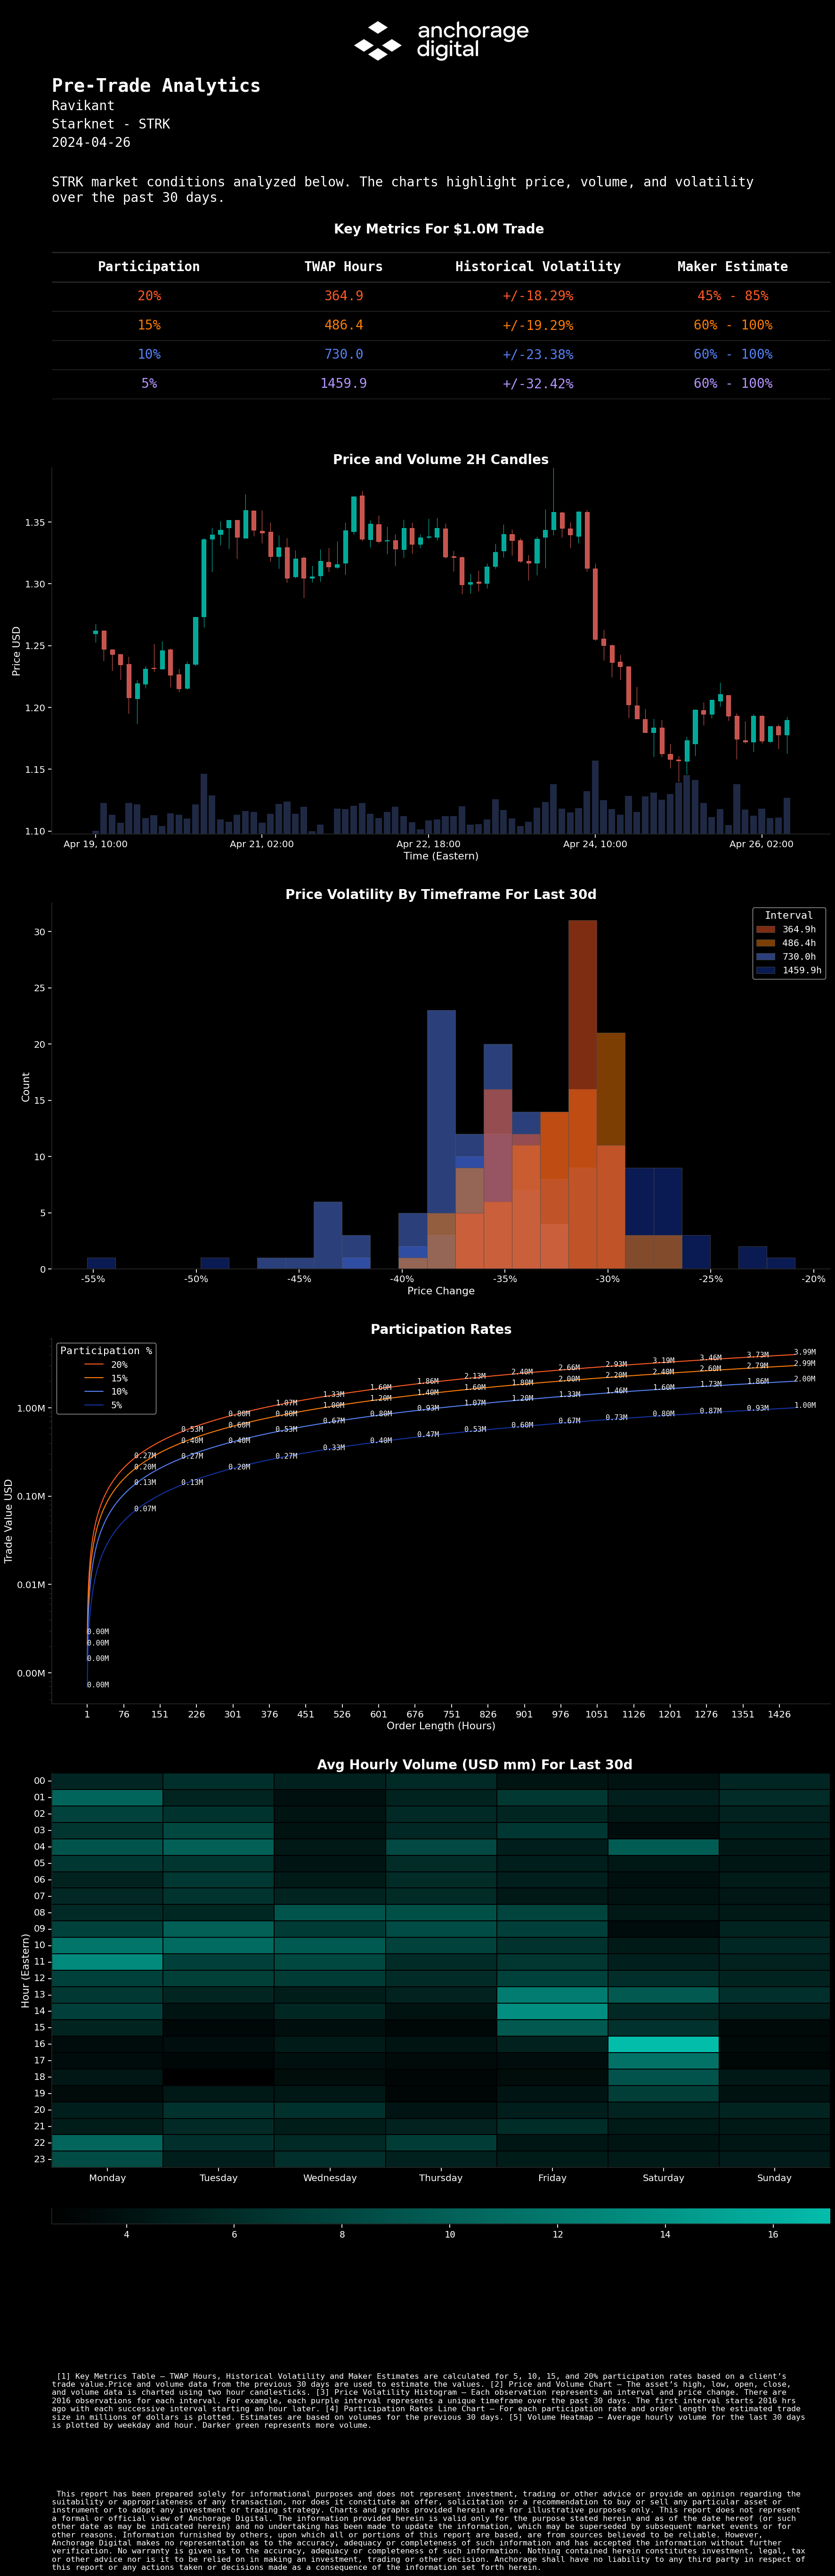

In [4]:
client = 'Ravikant'
#exchanges = ["Binance","Bybit", "Coinbase Exchange", "Kraken","KuCoin","Binance US","Bitfinex", "Huobi", "Uniswap (v3)", "OKX", "Gate.io"]
#exchanges = ["Binance", "Coinbase Exchange", "Kraken"]
#exchanges = ["OKX", "Coinbase Exchange", "Kraken"]
#exchanges = ["Bybit", "Coinbase Exchange", "Kraken","KuCoin","Bitfinex", "Huobi", "Uniswap (v3)", "OKX", "Gate.io"]
exchanges = ["Coinbase Exchange"]
currency = 'STRK'
currencycg = 'STRK'
order_size = 1000000
uncertainty = 0.2
amplifier = 2
twap = 'yes'
variable = 0
hourstocheck = 500

rg.generate_pretrade(client, currency, currencycg, order_size, uncertainty, amplifier, exchanges, twap, variable, hourstocheck)

In [ ]:
rg.generate_market_color(supported_assets_options={"debug":True})##talos_options={"SizeBuckets": [0.5, 0.25, 5, 25, 50]}

INFO (2024/03/09 06:21:10 AM): Starting market color report for BTC. Start date: 2024-01-09 End date: 2024-03-09 (Line:203 in report_generator.py))
INFO (2024/03/09 06:21:10 AM): Fetching funding rates (Line:206 in report_generator.py))
INFO (2024/03/09 06:21:10 AM): Fetching prices for 2024-01-09 to 2024-03-09 (Line:206 in messari.py))


Exception: Upgrade plan

INFO (2024/02/28 09:51:23 AM): Fetching Order Analytics (Line:1171 in report_generator.py))
INFO (2024/02/28 09:51:23 AM): Finished pagination (Line:358 in talos_utils.py))
INFO (2024/02/28 09:51:23 AM): Getting order infos (Line:1173 in report_generator.py))
INFO (2024/02/28 09:51:23 AM): Generating TCA for Pantera: Sell 25.00000000 BTC (BTC-USD) (Line:1184 in report_generator.py))
INFO (2024/02/28 09:51:23 AM): Fetching prices (Line:1185 in report_generator.py))
INFO (2024/02/28 09:51:23 AM): Fetching trade fills (Line:1189 in report_generator.py))
INFO (2024/02/28 09:51:24 AM): Calculating Market Participation (Line:1191 in report_generator.py))
INFO (2024/02/28 09:51:25 AM): Finished pagination (Line:358 in talos_utils.py))
INFO (2024/02/28 09:51:25 AM): Generating Analytics (Line:1194 in report_generator.py))
INFO (2024/02/28 09:51:25 AM): Calculating Maker/Taker ratio (Line:1196 in report_generator.py))
INFO (2024/02/28 09:51:25 AM): Calculating other metrics (Line:1199 in report

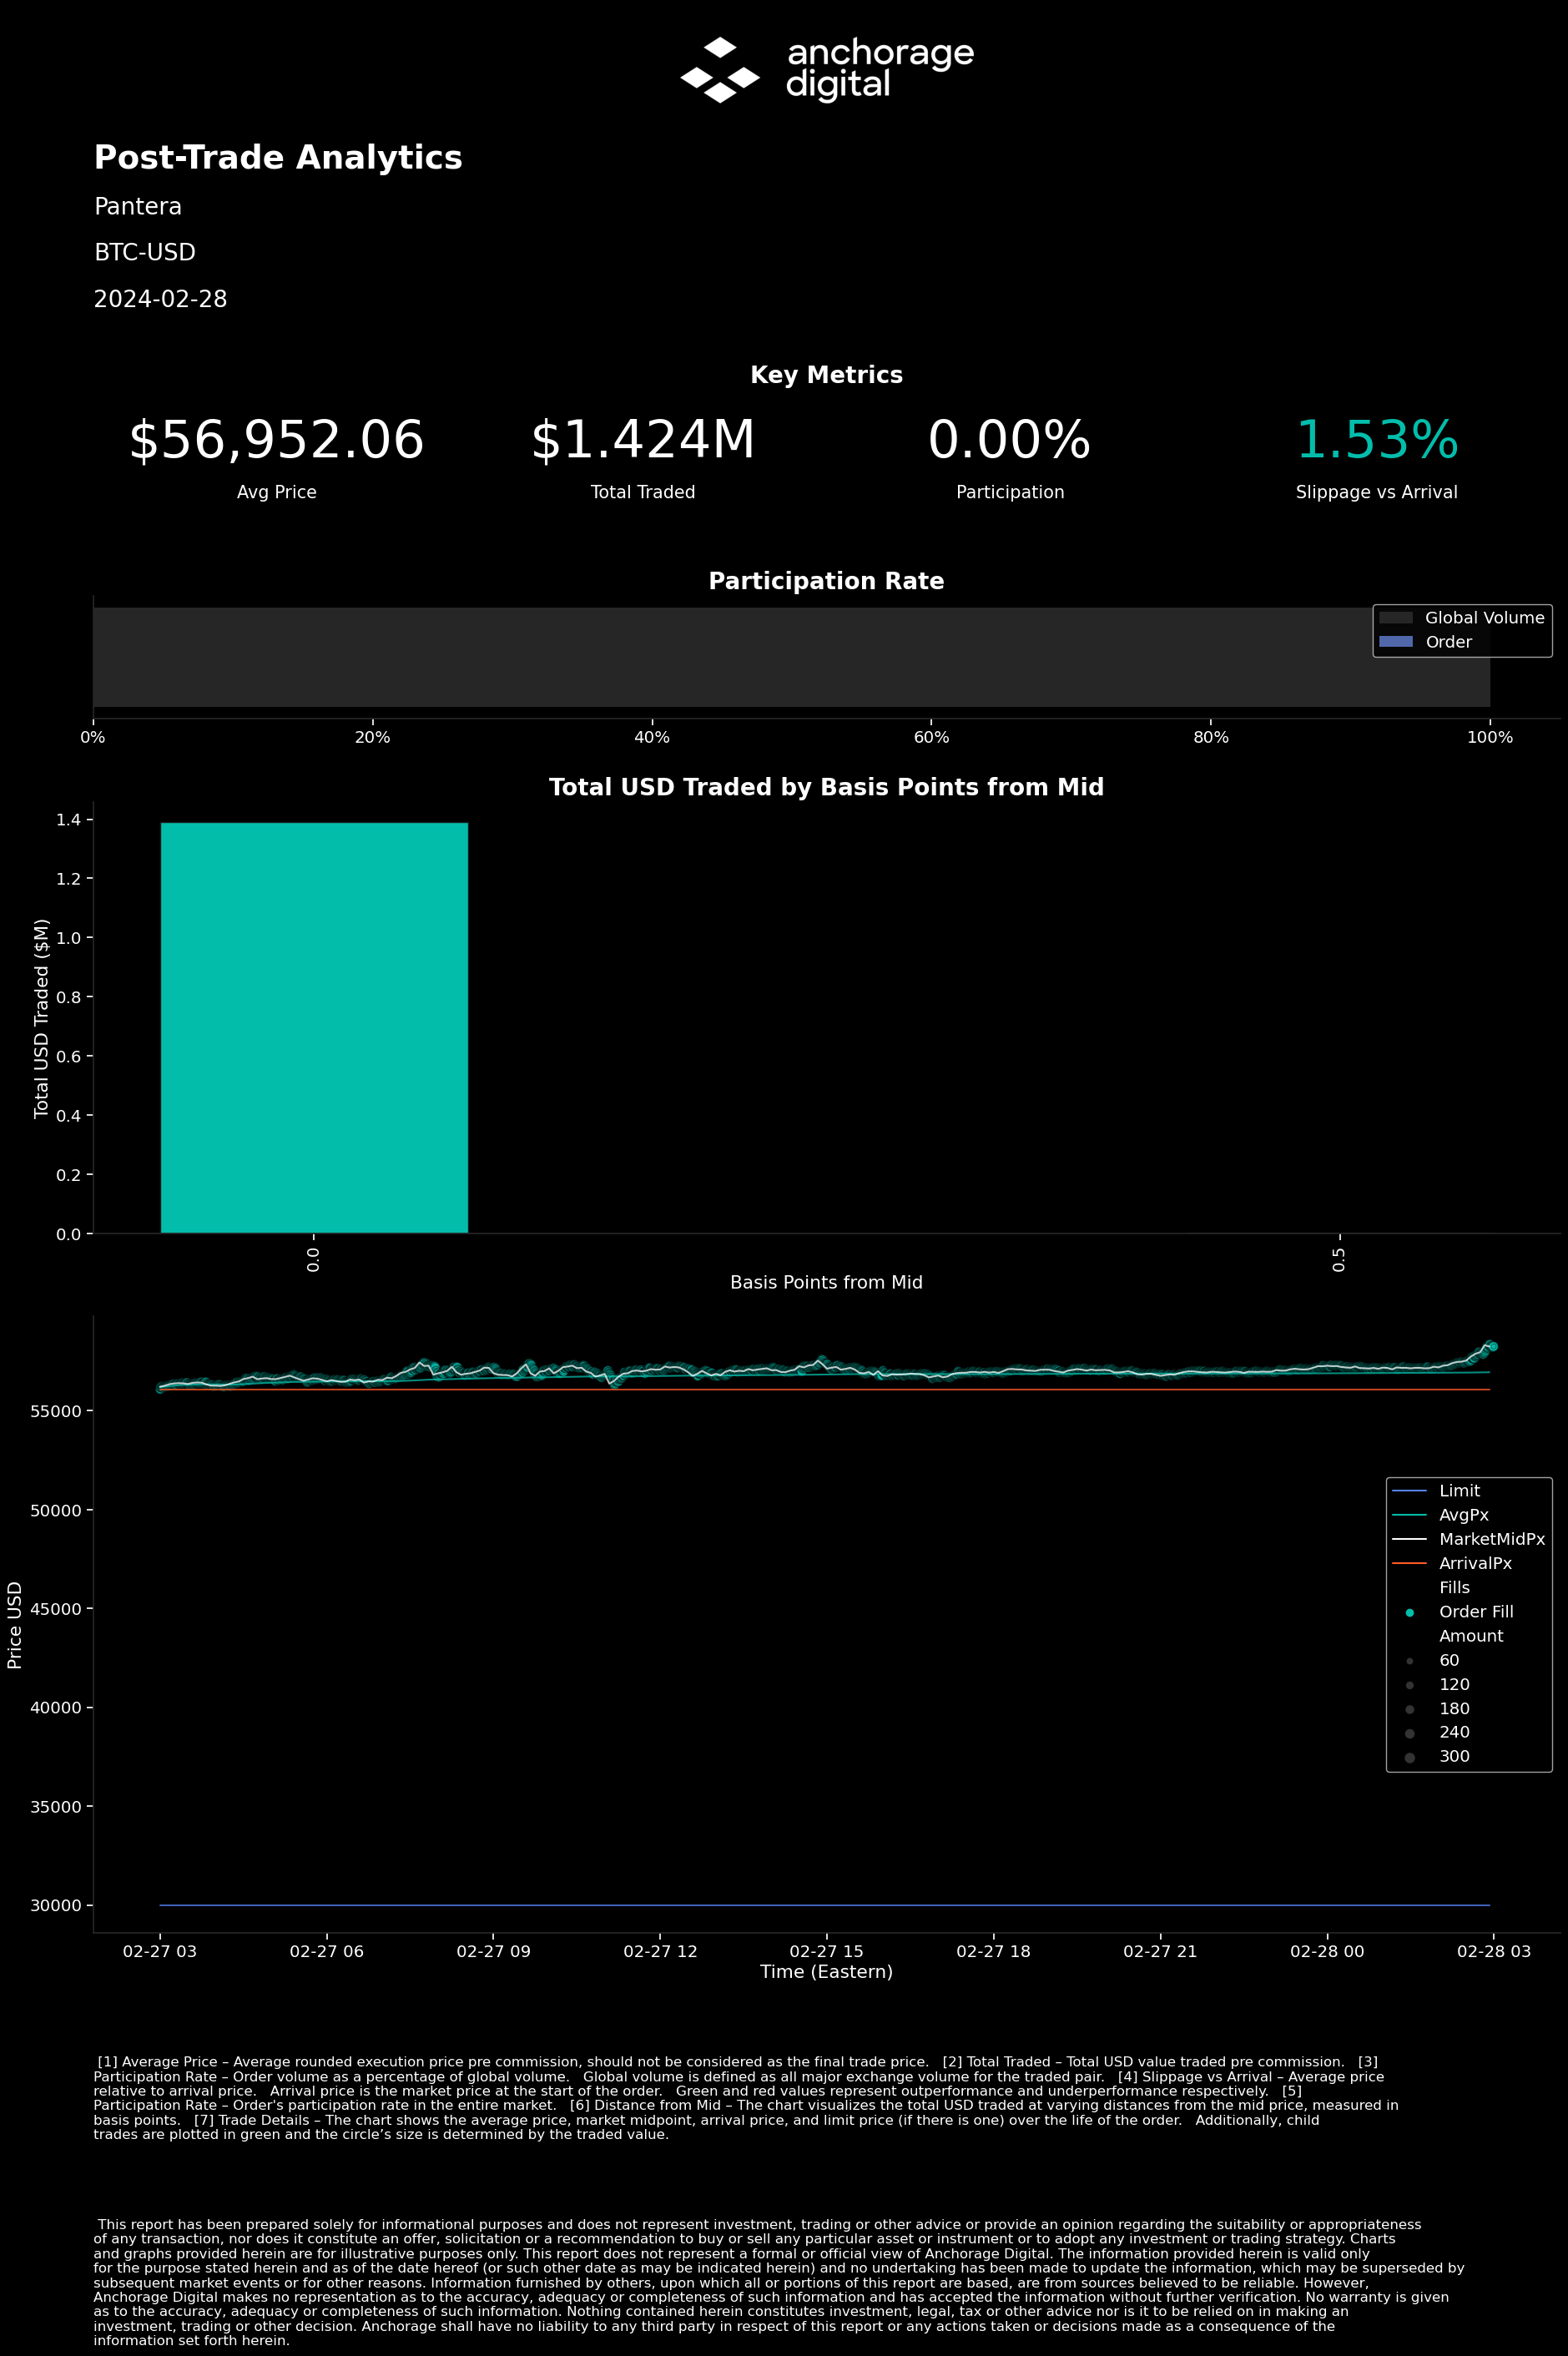

In [ ]:
client = 'Pantera'
order_id = "b75cd6aa-1d06-44e2-9d5a-0e9f2d777e9f"
tca_type = 'Post'
participation = 'global'
#filled_currency = "USD"
interval = '5M'
legend_location = 'best'

rg.generate_tca(client=client, order_id=order_id, tca_type=tca_type, participation=participation, interval=interval, venue="dealer")

#

***

# Guides
***

## Pre Trade Guide
*Generating Pre-Trade takes 11 arguments, where 4 have to be chosen when calling the function, and the other 7 adjust the charts and some values.*

**---------------------------------------**
#### Parameters

- **`client`** (str, required): Client name. 

- **`currency`**  (str, required): Currency symbol according to Messari (e.g., ETH, BTC, etc). 

- **`currencycg`**  (str, required): Currency symbol according to Coingecko - most times it will be exactly equal to the Messari currency.

- **`order_size`**  (int, required): Size of the order.

- **`uncertainty`**  (float, optional): the higher the number, the higher the interval for maker estimates. The default is 0.2 (20% to each side, totalling 40% when using amplifier as 2)
    - __Defaults to 0.2__ <br><br>
- **`amplifier`**  (float, optional): the higher this number, the higher the interval, but only lowering the bottom interval, floored by 10 (i.e. the upper bound remains the same). The higher the amplifier, the higher the interval. 

    Total interval = amplifier * uncertainty
    - __Defaults to 2__ <br><br>
- **`exchange`**  (list, optional): List of exchanges to use when calculating global volume. Full list: ["Binance","Bybit", "Coinbase Exchange", "Kraken","KuCoin","Binance US","Bitfinex", "Huobi", "Uniswap (v3)", "OKX", "Gate.io"]
    - __Defaults to ["Coinbase Exchange"]__ <br><br>
- **`twap`**  (str, optional): By default it's "yes". Only change to "no" when the amount is so little that it won't make sense to run a TWAP. This way the charts will adapt and have higher granularity, instead of comming out all bugged.
    - __Defaults to yes__ <br><br>
- **`variable`**  (int, optional): Change the number of labels that show up on the Participation rates chart to avoid making it too crowded.
    - __Defaults to 0__ <br><br>
- **`hourstocheck`**  (int, optional): This limits the size of the data (default 2500 hours) we ge from messari. The higher this number, the longer the code will take to run. Only increase if we believe that the TWAP may take more than 2500 hours, otherwise can be reduced to make the code faster.
    - __Defaults to 2500__ <br><br>
**---------------------------------------**
#### Examples

> In this example, we are generating the Pre-Trade for Client 1, who is looking to trade the equivalent of $25M of ETH. With uncertainty set as 0.1 and the amplifier as 2.5, the total interval is 0.1*2.5 = 25% (for example, 20%-45% maker estimate). The field exchanges is including a full list of the exchanges, the "yes" is set considering the notional is big enough to justify a TWAP. -1 is simply adjusting the labels on the chart, and 500 hours which is enough to cover the lenght of the TWAP.

`rg.generate_pretrade('Client 1', 'ETH', 'ETH', 25000000,0.1, 2.5, exchanges,'yes',-1,500)`

***

## TCA Guide
*Generating Pre-Trade takes 6 arguments, where 3 have to be chosen when calling the function, and the other 3 adjust the charts and some values.*

**---------------------------------------**
#### Parameters

- **`client`** (str, required): Client name. 

- **`order_id`**  (str, required): Order ID that shows up in Talos.

- **`filled_currency`**  (str, required): Currency symbol for the filled quantity according to Talos.
    - __Defaults to None__ <br><br>
- **`tca_type`**  (str, optional): Post should be used for orders that have ended, and Live should be used for running orders. Main difference is the Filled status bar that exists only on the Live version.
    - __Defaults to Post__ <br><br>
- **`participation`**  (str, optional): By using "talos", the participation rate will match what is found on the analytics in Talos. By using "global", the participation rate will be computed by dividing the notional traded by the existing volume during the trade.
    - __Defaults to talos__ <br><br>
- **`interval`**  (str, optional): Choosing the interval/resolution will directly impact the data shown on the report. For example, for orders running for one day, 5M will work perfectly; if the order runs for 2 weeks, "1H" will be more appropriate. If the interval is not consistent with the order's lenght, it will be easily noticeable on the chart and on the participation and slippage values. Guide:

    Duration | Resolution

    10m--------1S

    100m-------10S

    10h--------1M

    60h--------5M

    25d--------1H

    100d-------4H

    100d+------1D

    - __Defaults to 5M__ <br><br>
- **`legend_location`**  (str, optional): By using "best", the script will automatically place the chart legend in the best place possible, meaning it will avoid covering up lines in the chart.
    - __Defaults to best__ <br><br>
**---------------------------------------**
#### Examples

> Running the TCA for a16z, using the order_id for that order that is shown in Talos. This is after the trade is done so we chose Post, using global volume (otherwise participation would be inflated), on a 5M interval (the order ran for a day), with the legend_location being placed at the best spot possible.

`client = 'a16z'`<br><br>
`order_id = 'dc4bb578-7a8c-49e3-a816-9d6ad766a00a'`<br><br>
`tca_type = 'Post'`<br><br>
`participation = 'global'`<br><br>
`interval = '5M'`<br><br>
`legend_location = 'best'`<br><br>

`rg.generate_tca(client=client, order_id=order_id, tca_type=tca_type, participation=participation, interval=interval)`


***

## Market Color Guide
*Generate Market Color takes 8 arguments, where 1 is mandatory ('asset', although preset as BTC) and 7 others to adjust the chart and change options from underlying functions. Every "xxx_options" dictionary is created to change an underlying function without the need to modify things directly on preset_vars.py OR preset vars on each function itself. Use whichever you think it's easiest.*

**---------------------------------------**
#### Parameters

- **`asset`** (str, optional): Asset to be analyzed for the report. 
    - __Defaults to BTC__ <br><br>
- **`end`**  (datetime, optional): The last day to fetch data for. 
    - __Defaults to dt.datetime.now()__ <br><br>
- **`n_of_days`** (int, optional): Number of days to analyze historically from 'end'. 
    - __Defaults to 60__ <br><br>
- **`asset_prices_options`**  (dict, optional): Optional dictionary to change functions from get_yahoo_price_data() on reports auxiliary. For example, allows to change default parameters set on preset_vars, such as tickers_list, asset_renaiming and interval. These affect {asset} & Tech Performance vs Macro ({n_of_days} Days) chart, where you can customize the assets shown, their renamining and the interval of prices (i.e. daily, hourly...). 
    - __Defaults to {}__ <br><br>
- **`funding_rate_options`** (dict, optional): Optional dictionary to change functions from get_asset_and_avg_funding() on reports auxiliary. For example, allows to change default parameters, such as interval_price and interval_funding. These affect the Funding Rate Chart, although usually doesn't need to be changed. 
    - __Defaults to {}__ <br><br>
- **`returns_options`** (dict, optional): Optional dictionary to change functions from get_returns_data() on reports auxiliary. For example, allows to change default parameters, such as tickers_list, asset_renaming, interval and shift_days. These affect Rolling Asset Returns chart, where you can customize the assets shown, their renamining and the interval of returns. 
    - __Defaults to {}__ <br><br>
- **`talos_options`** (dict, optional): Optional dictionary to change functions from get_talos_execution_report() on reports auxiliary. For example, allows to change default parameters, such as exchanges, dealers, AmountBuckets, SizeBuckets, Depth, max_notional and step_size. These affect Execution Depth chart, where you can customize the exchanges, which dealers we are RFQing... For more details about AmountBuckets, SizeBuckets and Depth check Talos API Docs. max_notional and step_size creates a list of in asset units to RFQ for. 
    - __Defaults to {}__ <br><br>
- **`supported_assets_options`** (dict, optional): Optional dictionary to change functions from generate_supported_assets_returns() on reports auxiliary. For example, allows to change default parameters, such as shift_days and debug. These affect Returns for Assets Supported by Anchorage Digital's Trading Desk chart, where you can customize the interval of returns. Debug mode serves to use a limited set of assets to avoid fetching returns for all assets. 
    - __Defaults to {}__ <br><br>

**---------------------------------------**
#### Examples

> Simple market color

`rg.generate_market_color()`

> Simple market color for ETH

`rg.generate_market_color(ETH)`

> Using asset_prices_options to change default tickers presented in the Tech performance vs Macro chart to SPX and 30Y Yield and fetching info for ETH

`example_one = {"tickers_list": ['^GSPC','^TYX'], "asset_renaming":['S&P500', '30Y Yield']}`

`rg.generate_market_color(asset="ETH", asset_prices_options=example_one)`

> Fetching Talos Execution Depth only for Coinbase and Wintermute, changing maximum RFQ to 15M with step size of 10k USD

`example_two = {"exchanges": ["coinbase"], "dealers":["wintermute"], "max_notional":15000001, "step_size": "10000}`

`rg.generate_market_color(talos_options=example_two)`

In [ ]:
import preset_vars
print(preset_vars.EXPLANATIONTCA)